No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de regressão, classificação e regressão logística.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em python puro, Numpy, Keras e Tensorflow
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from random import random
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.initializers import RandomUniform
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

Using TensorFlow backend.


# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. O Perceptron nada mais é que um  classificador/regressor linear responsável por mapear uma ou mais entradas em uma saída desejada. Para isso, cada entrada  Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1 ... x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1 ... w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: inicialmente, o perceptron foi projetado para utilizar a função de ativação linear, ou seja, o resultado da junção aditiva representava a saída do Perceptron.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$y_{pred} = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x$: representa os atributos dos nossos dados que servem de entrada para o Perceptron.
- $w$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1).
- $y_{pred}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.
- De certa forma, o Perceptron __não faz uso do Gradiente Descendente__, especialmente no caso da classificação, quando a função _step_ é utilizada. 

## Regra de Aprendizado do Perceptron

Se você já leu sobre o Perceptron antes, você provavelmente já viu algo sobre a __Regra de Aprendizado do Perceptron__ (_Perceptron Learning Rule_) que define o modo como o perceptron aprende - isto é, a forma como os pesos são atualizados. Em geral, essa atualização dá-se pela seguinte fórmula:

$$w_i = w_i - \lambda(y_i - y_{pred})x_i$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Mas você já imaginou da onde vem essa fórmula? Em primeiro lugar, o método de atualização dos pesos é baseado no __Gradiente Descendente__. Sendo $\overrightarrow{w} = \{w_1, w_2, ..., w_D\}$, a atualização dos pesos é dados por:

$$\overrightarrow{w} = \overrightarrow{w} - \Delta{\overrightarrow{w}}$$

em que:

$$\Delta{\overrightarrow{w}} = \lambda\nabla E(\overrightarrow{w})$$

Sendo $\nabla E(\overrightarrow{w})$ o gradiente de uma função que depende de $\overrightarrow{w}$ e que queremos minimizar.

Agora, imagine que estamos utilizando um Perceptron para regressão, cuja função de custo geralmente é:

$$J(w) = \frac{1}{2}\sum_{i}^N (y_i - y_{pred_i})^2$$

Onde $N$ é a quantidade de amostras nos dados, e as demais variáveis representam as mesmas vistas anteriormente. Repare que a função de custo é quase uma _Mean Squared Error (MSE)_, só que ao invés de dividir por $N$, está se dividindo por 2 o resultado do somatório. O por quê disso será entendido mais a frente na demonstração.

Queremos encontrar o vetor $\overrightarrow{w}$ que minimiza a função $J$. Assim, temos:

$$\frac{\partial J}{\partial w_i} = \frac{\partial}{\partial w_i}\frac{1}{2}\sum_i^N (y_i - y_{pred_i})^2$$

Como a derivada do somatório é igual ao somatório das derivadas:

$$= \frac{1}{2}\sum_i^N \frac{\partial}{\partial w_i}(y_i - y_{pred_i})^2$$

Aplicando a regra da cadeia:

$$= \sum_i^N (y_i - y_{pred_i})\frac{\partial}{\partial w_i}(y_i - y_{pred_i})$$

Repare que, quando derivamos $(y_i - y_{pred_i})^2$, o expoente 2, ao sair do somatório, foi multiplicado por $\frac{1}{2}$, tornando-o 1. Isso é o que os matemáticos denominam de "conveniência matemática". 

Como $y_{pred_i} = x_iw_i + b$ é uma função que depende de $w$, e sua derivada em relação a $w_i$ é apenas $x_i$, temos que:

$$\frac{\partial J}{\partial w_i} = \sum_i^N (y_i - y_{pred_i})(-x_i)$$
$$\frac{\partial J}{\partial w_i} = -\sum_i^N (y_i - y_{pred_i})x_i$$

Na forma vetorizada, essa equação torna-se:

$$\frac{\partial J}{\partial \overrightarrow{w}} = -(\overrightarrow{y} - \overrightarrow{y}_{pred})\overrightarrow{x}$$

# Regressão 

In [2]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


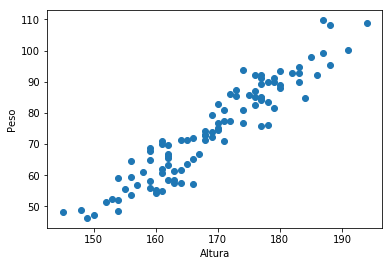

In [3]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [4]:
print(x.shape, y.shape)

(100,) (100,)


In [5]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100, 1)


### Python

__Exercício__: tentar estimar as learning_rates de __w__ e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [6]:
D = x.shape[1]
w = 2*random() - 1 # [1xD]
b = 2*random() - 1 # [1x1]

for step in range(10001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = x_i*w + b
        error = y_i[0] - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

step 0: [ 4118.06515261]
step 1000: [-7.83671467]
step 2000: [-3.28863759]
step 3000: [-1.38006009]
step 4000: [-0.57913522]
step 5000: [-0.24303116]
step 6000: [-0.10198679]
step 7000: [-0.04279824]
step 8000: [-0.01796006]
step 9000: [-0.00753685]
step 10000: [-0.0031628]
w:  [ 1.36977103]
b:  [-157.8766512]


### Numpy 

In [7]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

for step in range(10001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred 
        w = w + 1e-7*np.dot(error.T, x_i)
        b = b + 1e-2*error
        sum_error += error
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 6135.53069395]]
step 1000: [[-8.83347161]]
step 2000: [[-3.70692158]]
step 3000: [[-1.55559085]]
step 4000: [[-0.65279582]]
step 5000: [[-0.27394245]]
step 6000: [[-0.11495856]]
step 7000: [[-0.04824178]]
step 8000: [[-0.02024442]]
step 9000: [[-0.00849547]]
step 10000: [[-0.00356508]]
w:  [[ 1.36974331]]
b:  [[-157.87202051]]


### Numpy com Pré-processamento

In [8]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [9]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[ 33.60164767]]
b:  [ 74.99636287]


In [10]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

learning_rate = 1e-3

for step in range(1001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 7063.98034819]]
step 100: [[ 3.58633246]]
step 200: [[ 0.5038813]]
step 300: [[ 0.07763479]]
step 400: [[ 0.01196181]]
step 500: [[ 0.00184305]]
step 600: [[ 0.00028397]]
step 700: [[  4.37540196e-05]]
step 800: [[  6.74152292e-06]]
step 900: [[  1.03872691e-06]]
step 1000: [[  1.60060743e-07]]
w:  [[ 33.60180844]]
b:  [[ 74.93896427]]


### Keras 

In [11]:
D = x.shape[1]

model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(D,)))
model.compile(loss='mse', optimizer='sgd')

In [12]:
model.fit(x, y, batch_size=x.shape[0], epochs=2000, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()

print('erro: ', error)
print('w: ', w)
print('b: ', b)

erro:  26.082983017
w:  [[ 33.58242798]]
b:  [ 74.99577332]


### TensorFlow 

In [13]:
D = x.shape[1]

learning_rate = 1e-3
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(1, D))
    g_y = tf.placeholder(dtype=tf.float64, shape=(1,))
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    g_error = tf.subtract(g_y, y_pred)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

In [14]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1001):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%100 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())

step 0: [[ 7111.6054363]]
step 100: [[ 3.62635071]]
step 200: [[ 0.50971965]]
step 300: [[ 0.07853434]]
step 400: [[ 0.01210041]]
step 500: [[ 0.00186441]]
step 600: [[ 0.00028726]]
step 700: [[  4.42609898e-05]]
step 800: [[  6.81963236e-06]]
step 900: [[  1.05074865e-06]]
step 1000: [[  1.61904715e-07]]
w:  [[ 33.60180844]]
b:  [ 74.93896427]


## Exercício de Regressão

In [2]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


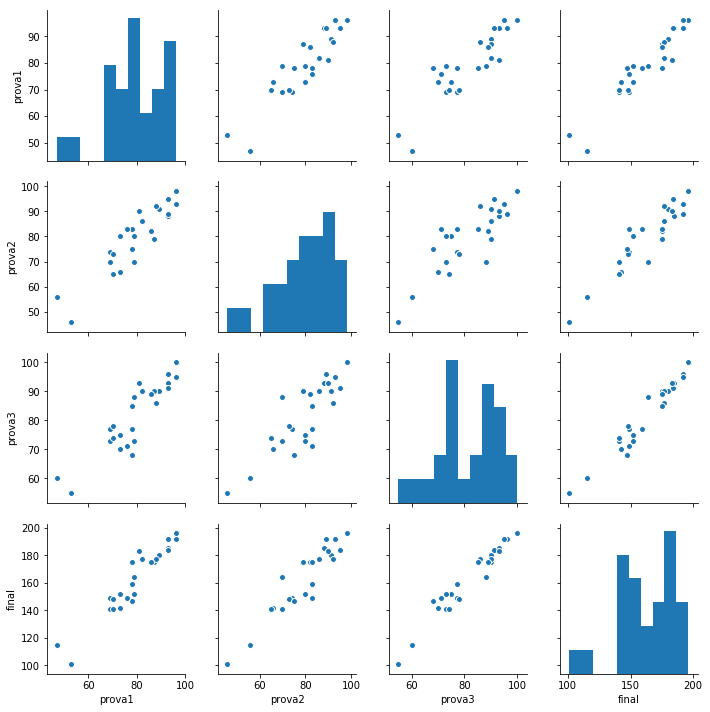

In [3]:
sb.pairplot(df)

In [4]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


In [5]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [6]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[  8.72048636  14.1054877   26.26749487]]
b:  [ 150.65175754]


### Python

In [7]:
D = x.shape[1]
w = [2*random() - 1 for d in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(2001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

step 0: 3514.1488643326165
step 200: 0.5182893144849032
step 400: 0.10415316308406375
step 600: 0.024718105133544555
step 800: 0.006907358089321747
step 1000: 0.0021725415259652436
step 1200: 0.0007312148488551884
step 1400: 0.00025451669161213886
step 1600: 8.997086847273295e-05
step 1800: 3.202345943975615e-05
step 2000: 1.1432376567199753e-05
w:  [8.7252006699206355, 14.139485088048877, 26.320509205536574]
b:  150.711193241


### Numpy

In [8]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(2001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 3520.40155908]]
step 200: [[ 0.50291236]]
step 400: [[ 0.10139453]]
step 600: [[ 0.02415451]]
step 800: [[ 0.00677107]]
step 1000: [[ 0.00213387]]
step 1200: [[ 0.00071893]]
step 1400: [[ 0.00025036]]
step 1600: [[  8.85216060e-05]]
step 1800: [[  3.15106194e-05]]
step 2000: [[  1.12497565e-05]]
w:  [[  8.72519401  14.13948939  26.32051175]]
b:  [[ 150.71119359]]


### Keras

In [9]:
D = x.shape[1]

model2 = Sequential()
model2.add(Dense(units=1, activation='linear', input_shape=(D,)))
model2.compile(loss='mse', optimizer='sgd')

In [10]:
model2.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)
error = model2.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model2.get_weights()

print('erro: ', error)
print('w: ', w)
print('b: ', b)

erro:  5.84976196289
w:  [[ 10.55954361]
 [ 13.37724018]
 [ 25.14847946]]
b:  [ 150.48866272]


### Tensorflow

In [11]:
D = x.shape[1]

learning_rate = 1e-2
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(1, D))
    g_y = tf.placeholder(dtype=tf.float64, shape=(1,))
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    g_error = tf.subtract(g_y, y_pred)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

In [12]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%200 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())

step 0: [[ 3522.96666343]]
step 200: [[ 0.50635507]]
step 400: [[ 0.10233065]]
step 600: [[ 0.02444383]]
step 800: [[ 0.00686754]]
step 1000: [[ 0.0021673]]
step 1200: [[ 0.00073073]]
step 1400: [[ 0.00025456]]
step 1600: [[  9.00184775e-05]]
step 1800: [[  3.20456073e-05]]
step 2000: [[  1.14410926e-05]]
w:  [[  8.72520101  14.13948486  26.32050908]]
b:  [ 150.71119322]


# Classificação

Para transformar o Perceptron em um classificador binário, temos que fazer uma pequena modificação no cálculo da saída:

$$y_{pred} = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

## Porta AND/OR

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1]) # porta OR
#y = np.array([[0, 0, 0, 1]]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4,)


### Python

In [4]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(101):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: 3
step 10: 3
step 20: 1
step 30: 0
step 40: -1
step 50: -1
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w:  [0.15952183825325944, 0.016386417185949638]
b:  -0.00775595675279
y_pred: [-0.00775596  0.00863046  0.15176588  0.1681523 ]


### Numpy

In [5]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(100):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(w, x.T)+b))

step 0: [[3]]
step 10: [[1]]
step 20: [[-1]]
step 30: [[-1]]
step 40: [[-1]]
step 50: [[-1]]
step 60: [[0]]
step 70: [[0]]
step 80: [[0]]
step 90: [[0]]
w:  [[ 0.00719233  0.01556843]]
b:  [[-0.00666437]]
y_pred: [[-0.00666437  0.00890406  0.00052796  0.01609639]]


### Keras

In [6]:
D = x.shape[1]

model3 = Sequential()
model3.add(Dense(units=1, activation='linear', input_dim=D))
model3.compile(loss='categorical_hinge', optimizer='sgd')

In [7]:
model3.fit(x, y, epochs=1000, batch_size=x.shape[0], verbose=0)
y_pred = model3.predict(x, verbose=0)
error = model3.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model3.get_weights()

print('error: ', error)
print('w:', w)
print('b:', b)
print('y_pred:', y_pred)

error:  0.0
w: [[ 2.00449991]
 [ 2.00410986]]
b: [-1.00249922]
y_pred: [[-1.00249922]
 [ 1.00161064]
 [ 1.00200069]
 [ 3.00611067]]


### TensorFlow

In [8]:
D = x.shape[1]

learning_rate = 1e-2
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(None, D))
    g_y = tf.placeholder(dtype=tf.float64)
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    y_pred_bin = tf.where(y_pred > 0, tf.ones_like(y_pred), tf.zeros_like(y_pred))
    g_error = tf.subtract(g_y, y_pred_bin)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

In [9]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%10 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    y_pred = sess.run([y_pred], feed_dict={g_x:x, g_y:y})
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())
    print('y_pred:', y_pred)

step 0: [[ 3.]]
step 10: [[ 3.]]
step 20: [[ 3.]]
step 30: [[ 1.]]
step 40: [[-1.]]
step 50: [[ 0.]]
step 60: [[ 0.]]
step 70: [[ 0.]]
step 80: [[ 0.]]
step 90: [[ 0.]]
step 100: [[ 0.]]
w:  [[ 0.00382058  0.21911   ]]
b:  [-0.00361065]
y_pred: [array([[ -3.61065497e-03],
       [  2.15499345e-01],
       [  2.09920254e-04],
       [  2.19319920e-01]])]


## Exercício de Classificação

(100, 2) (100, 1)


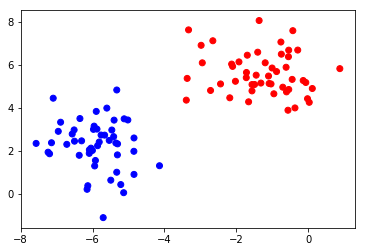

In [2]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

In [3]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

    y_mesh = np.dot(x_mesh, w.T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

step 0: 14
step 5: 0
step 10: 0
step 15: 0
step 20: 0
step 25: 0
step 30: 0
step 35: 0
step 40: 0
step 45: 0
step 50: 0
w:  [0.22480171770912827, 0.0072135332745247027]
b:  0.865091652439


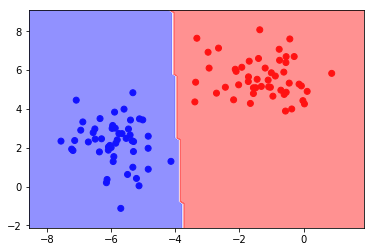

In [4]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(51):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([w[d]*x_i[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%5 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, np.array(w), b)

### Numpy

step 0: [[0]]
step 10: [[0]]
step 20: [[0]]
step 30: [[0]]
step 40: [[0]]
step 50: [[0]]
w:  [[ 0.76602086  0.79751159]]
b:  [[-0.11103001]]


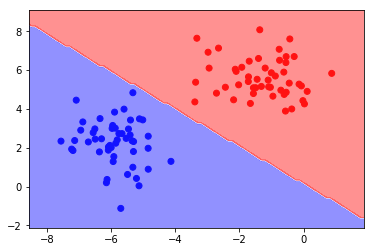

In [5]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(51):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        sum_error += error
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))
    
print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)

### Keras

In [6]:
D = x.shape[1]

model4 = Sequential()
model4.add(Dense(units=1, activation='linear', input_dim=D))
model4.compile(loss='categorical_hinge', optimizer='sgd')

0.0400848016143
[[ 0.37341708]
 [ 0.34565946]] [-0.04819999]


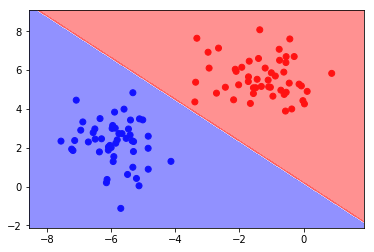

In [7]:
model4.fit(x, y, epochs=100, batch_size=x.shape[0], verbose=0)
y_pred = model4.predict(x, verbose=0)
error = model4.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model4.get_weights()
print(error)
print(w,b)

plot_linear_classifier(x, y, w.reshape(1, 2), b)

### Tensorflow

In [8]:
D = x.shape[1]

learning_rate = 1e-2
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    g_x = tf.placeholder(dtype=tf.float64, shape=(None, D))
    g_y = tf.placeholder(dtype=tf.float64)
    
    g_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    g_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(g_x, g_w, transpose_b=True), g_b)
    y_pred_bin = tf.where(y_pred > 0, tf.ones_like(y_pred), tf.zeros_like(y_pred))
    g_error = tf.subtract(g_y, y_pred_bin)
    
    delta = tf.matmul(g_error, g_x, transpose_a=True)
    train_w = tf.assign(g_w, tf.add(g_w, learning_rate*delta))
    train_b = tf.assign(g_b, tf.add(g_b, learning_rate*tf.squeeze(g_error)))

step 0: [[ 3.]]
step 10: [[ 0.]]
step 20: [[ 0.]]
step 30: [[ 0.]]
step 40: [[ 0.]]
step 50: [[ 0.]]
w:  [[ 0.64235515  0.7263423 ]]
b:  [-0.94527676]


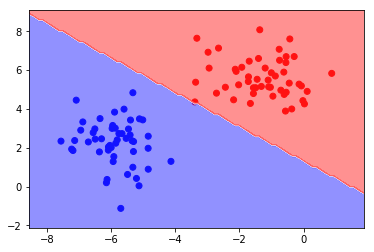

In [9]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(51):
        sum_error = 0
        for x_i, y_i in zip(x, y):
            feed_dict = {g_x:x_i.reshape((1,D)), g_y:y_i}
            error, _, _ = sess.run([g_error, train_w, train_b], feed_dict=feed_dict)
            sum_error += error

        if step%10 == 0:
            print('step {0}: {1}'.format(step, sum_error))
    
    print('w: ', g_w.eval())
    print('b: ', g_b.eval())
    plot_linear_classifier(x, y, g_w.eval(), g_b.eval())